In [1]:
from mlagents_envs.environment import UnityEnvironment

In [2]:
from pyvirtualdisplay import Display

In [3]:
display = Display(backend="xvnc", size=(64,64), visible=0, rfbport=5908)
display.start()

In [9]:
display.stop()

In [4]:
env = UnityEnvironment(file_name="RC.x86_64", seed=1, timeout_wait=1000)

This means that some features may not work unless you upgrade the package with the lower version.Please find the versions that work best together from our release page.
https://github.com/Unity-Technologies/ml-agents/releases


In [5]:
env.reset()

In [6]:
#Picking the behavior Name
behavior_name = list(env.behavior_specs)[0] 
print(f"Name of the behavior : {behavior_name}")
spec = env.behavior_specs[behavior_name]

Name of the behavior : My Behavior?team=0


In [7]:
# Examine the number of observations per Agent
print("Number of observations : ", len(spec.observation_shapes))

# Is there a visual observation ?
# Visual observation have 3 dimensions: Height, Width and number of channels
vis_obs = any(len(shape) == 3 for shape in spec.observation_shapes)
print("Is there a visual observation ?", vis_obs)

Number of observations :  2
Is there a visual observation ? True


In [8]:
# Is the Action continuous or multi-discrete ?
if spec.is_action_continuous():
  print("The action is continuous")
if spec.is_action_discrete():
  print("The action is discrete")

# How many actions are possible ?
print(f"There are {spec.action_size} action(s)")

# For discrete actions only : How many different options does each action has ?
if spec.is_action_discrete():
  for action, branch_size in enumerate(spec.discrete_action_branches):
    print(f"Action number {action} has {branch_size} different options")

The action is discrete
There are 1 action(s)
Action number 0 has 1 different options


In [9]:
decision_steps, terminal_steps = env.get_steps(behavior_name)

In [10]:
env.step()

In [11]:
spec.observation_shapes #first observation is the visual of the agent - 64 X 64 x 3 -> RGB image

[(64, 64, 3), (87,)]

Here is the first visual observation


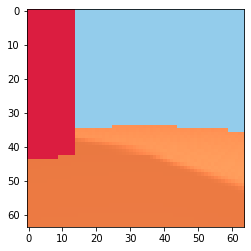

First vector observations :  [-9.8091431e+00  4.0000000e+00  1.0398216e+00  0.0000000e+00
  2.1100000e+02  0.0000000e+00 -4.0401659e+00  1.0000000e+01
 -2.0324142e+01 -2.3502338e+01  1.3000000e+01  2.0658098e+01
  7.5478516e+00  1.2000000e+01 -3.3518845e+01 -1.9489662e+01
  1.4000000e+01  3.4777771e+01 -1.0046349e+01  1.0000000e+01
  2.7131989e+01  1.1967681e+01  1.0000000e+01 -2.5083820e+01
  1.1611433e+01  1.1000000e+01 -3.1390654e+01  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  1.6000000e+01  2.0000000e+01  1.6000000e+01
  1.7000000e+01  2.7000000e+01  1.7000000e+01  1.6000000e+01
  2.5000000e+01  1.7000000e+01  1.7000000e+01  2.8000000e+01
  1.7000000e+01  1.6000000e+01  2.0000000e+01  1.7000000e+01
  1.6000000e+01  2.1000000e+01  1.6000000e+01  1.7000000e+01
  2.2000000e+01  1.6000000e+01  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  8.5882360e-01  1.1372550e-01  2.5098041e-01  8.5882360

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

for index, shape in enumerate(spec.observation_shapes):
  if len(shape) == 3:
    print("Here is the first visual observation")
    plt.imshow(decision_steps.obs[index][0,:,:,:])
    plt.show()

for index, shape in enumerate(spec.observation_shapes):
  if len(shape) == 1:
    print("First vector observations : ", decision_steps.obs[index][0,:])

In [13]:
env.reset()

Here is the first visual observation


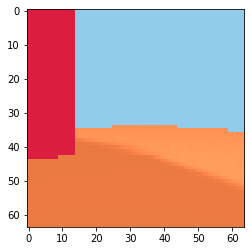

First vector observations :  [-9.8091431e+00  4.0000000e+00  1.0398216e+00  0.0000000e+00
  2.1100000e+02  0.0000000e+00 -4.0401659e+00  1.0000000e+01
 -2.0324142e+01 -2.3502338e+01  1.3000000e+01  2.0658098e+01
  7.5478516e+00  1.2000000e+01 -3.3518845e+01 -1.9489662e+01
  1.4000000e+01  3.4777771e+01 -1.0046349e+01  1.0000000e+01
  2.7131989e+01  1.1967681e+01  1.0000000e+01 -2.5083820e+01
  1.1611433e+01  1.1000000e+01 -3.1390654e+01  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  1.6000000e+01  2.0000000e+01  1.6000000e+01
  1.7000000e+01  2.7000000e+01  1.7000000e+01  1.6000000e+01
  2.5000000e+01  1.7000000e+01  1.7000000e+01  2.8000000e+01
  1.7000000e+01  1.6000000e+01  2.0000000e+01  1.7000000e+01
  1.6000000e+01  2.1000000e+01  1.6000000e+01  1.7000000e+01
  2.2000000e+01  1.6000000e+01  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  8.5882360e-01  1.1372550e-01  2.5098041e-01  8.5882360

In [14]:
for index, shape in enumerate(spec.observation_shapes):
  if len(shape) == 3:
    print("Here is the first visual observation")
    plt.imshow(decision_steps.obs[index][0,:,:,:])
    plt.show()

for index, shape in enumerate(spec.observation_shapes):
  if len(shape) == 1:
    print("First vector observations : ", decision_steps.obs[index][0,:])

In [15]:
#import numpy

In [16]:
import numpy as np
import random

In [17]:
actions=[]
for i in range(5):
    actions.append(np.full((1, ),i+1)) 

In [18]:
actions

[array([1]), array([2]), array([3]), array([4]), array([5])]

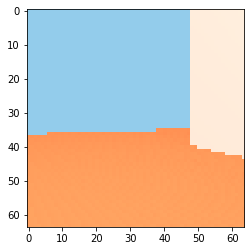

In [92]:
for i in range(20):
    env.set_action_for_agent("My Behavior?team=0",0, random.choice(actions))
    env.step()
    decision_steps, terminal_steps = env.get_steps(behavior_name)
    im=decision_steps.obs[0][0,:,:,:]
    plt.imshow(im)
#     plt.imsave("Rollouts/harsha"+str(i+15500)+".png", im)

env.reset()
    

### Define a function that can construct a TP view and put buildings as per observations

#### 1. We have building positions, scales, colors
#### 2. Get the color of the floor
#### 3. Put the rectangles on the floor as per the observations


In [93]:
obsComplete = decision_steps.obs[index][0,:]

In [83]:
obsComplete.shape

(87,)

In [67]:
type(obsComplete)

numpy.ndarray

In [68]:
def getObservations(obsComplete):
    #agents position
    agentPos=np.take(obsComplete, [0,1,2])
    #agents orientation
    agentOrient=np.take(obsComplete,[3,4,5])
    #buildingPos,Scale,Color
    buildingPos=[]
    buildingScale=[]
    buildingColor=[]
    #buildings position
    for i in range(0,7):
        buildingPos.append(np.take(obsComplete,[3*(i+2),3*(i+2)+1,3*(i+2)+2]))
        buildingScale.append(np.take(obsComplete,[3*(i+11),3*(i+11)+1,3*(i+11)+2]))
        buildingColor.append(np.take(obsComplete,[3*(i+20),3*(i+20)+1,3*(i+20)+2]))
#     print("BuildingPos: \n",buildingPos,"\n\n\n","buildingScale: \n",buildingScale,"\n\n\n","buildingColor: \n",buildingColor,"\n")

    return agentPos,agentOrient,buildingPos,buildingScale,buildingColor

In [94]:
agentPos1,agentOrient1,buildingPos1,buildingScale1,buildingColor1 = getObservations(obsComplete)

### Now making the map
#### 1. Use the floor color
#### 2. Create a canvas of size 64 x 64
#### 3. Place a rectangle with cordinates

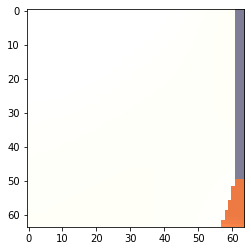

In [70]:
plt.imshow(im)

In [71]:
im[:,60]

array([[1.        , 1.        , 0.96862745],
       [1.        , 1.        , 0.96862745],
       [1.        , 1.        , 0.9647059 ],
       [1.        , 1.        , 0.9647059 ],
       [1.        , 1.        , 0.9647059 ],
       [1.        , 1.        , 0.9647059 ],
       [1.        , 1.        , 0.9647059 ],
       [1.        , 1.        , 0.9647059 ],
       [1.        , 1.        , 0.9647059 ],
       [1.        , 1.        , 0.9647059 ],
       [1.        , 1.        , 0.9647059 ],
       [1.        , 1.        , 0.9647059 ],
       [1.        , 1.        , 0.9647059 ],
       [1.        , 1.        , 0.9647059 ],
       [1.        , 1.        , 0.9647059 ],
       [1.        , 1.        , 0.9647059 ],
       [1.        , 1.        , 0.9647059 ],
       [1.        , 1.        , 0.9647059 ],
       [1.        , 1.        , 0.9647059 ],
       [1.        , 1.        , 0.96862745],
       [1.        , 1.        , 0.96862745],
       [1.        , 1.        , 0.96862745],
       [1.

In [72]:
buildingPos1[0]

array([ 8.301248 , 10.       ,  3.7750702], dtype=float32)

In [73]:
buildingScale1[0]

array([16., 20., 16.], dtype=float32)

In [74]:
buildingColor1[0]

array([0.5019608, 0.4901961, 0.5921569], dtype=float32)

## Canvas

In [ ]:
[1., 0.56078434, 0.32156864]

In [95]:
im2 = np.zeros((100,100,3))

In [96]:
im2[:,:]=[1., 0.56078434, 0.32156864]

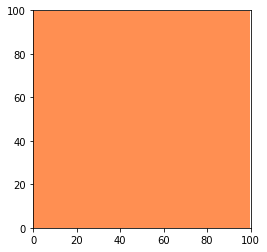

In [97]:
plt.axis([0,100,0,100])
plt.imshow(im2)

In [98]:
buildCentrePos_x=[]
buildCentrePos_z=[]
buildWidth_x=[]
buildHeight_z=[]
buildingcordinate_xMax=[]
buildingcordinate_xMin=[]
buildingcordinate_zMax=[]
buildingcordinate_zMin=[]
for i in range(7):
    #get all the x and z of the buildings centre
    buildCentrePos_x.append(buildingPos1[i][0])
    buildCentrePos_z.append(buildingPos1[i][1])
    buildWidth_x.append(buildingScale1[0][0])
    buildHeight_z.append(buildingScale1[0][1])
    
    
    #get the xMax and xMin, zMax and zMin
    buildingcordinate_xMax.append((buildCentrePos_x[i]+buildWidth_x[i]/2)+50)
    buildingcordinate_xMin.append((buildCentrePos_x[i]-buildWidth_x[i]/2)+50)
    buildingcordinate_zMax.append((buildCentrePos_z[i]+buildHeight_z[i]/2)+50)
    buildingcordinate_zMin.append((buildCentrePos_z[i]-buildHeight_z[i]/2)+50)    

In [99]:
#Debug for the first 2 buildings and its measurements
for i in range(2):
    
    print(buildCentrePos_x[i],"\n")
    print(buildCentrePos_z[i],"\n")
    print(buildWidth_x[i],"\n")
    print(buildHeight_z[i],"\n")
    print(buildingcordinate_xMax[i],"\n")
    print(buildingcordinate_xMin[i],"\n")
    print(buildingcordinate_zMax[i],"\n")
    print(buildingcordinate_zMin[i],"\n")
    print("done"+str(i)+"th building\n")

23.280544 

11.0 

17.0 

22.0 

81.78054428100586 

64.78054428100586 

72.0 

50.0 

done0th building

-20.83897 

14.0 

17.0 

22.0 

37.66102981567383 

20.661029815673828 

75.0 

53.0 

done1th building



In [33]:
# buildCentrePos_x=buildingPos1[0][0]
# buildCentrePos_z=buildingPos1[0][1]
# buildWidth_x=buildingScale1[0][0]
# buildHeight_z=buildingScale1[0][1]
# print(buildCentrePos_x,buildCentrePos_z,buildWidth_x,buildHeight_z)

-24.19284 11.0 16.0 22.0


In [34]:
# buildingcordinate_xMax=buildCentrePos_x+buildWidth_x/2
# buildingcordinate_xMin=buildCentrePos_x-buildWidth_x/2
# buildingcordinate_zMax=buildCentrePos_z+buildHeight_z/2
# buildingcordinate_zMin=buildCentrePos_z-buildHeight_z/2

# print(buildingcordinate_xMax, buildingcordinate_xMin, buildingcordinate_zMax, buildingcordinate_zMin)


# #as the unity map is 100 x 100 with origin at 100 -> transforming that axis to this
# #add 50 to all
# buildingcordinate_xMax+=50
# buildingcordinate_xMin+=50
# buildingcordinate_zMax+=50
# buildingcordinate_zMin+=50
# print(buildingcordinate_xMax, buildingcordinate_xMin, buildingcordinate_zMax, buildingcordinate_zMin)


-16.192840576171875 -32.192840576171875 22.0 0.0
33.807159423828125 17.807159423828125 72.0 50.0


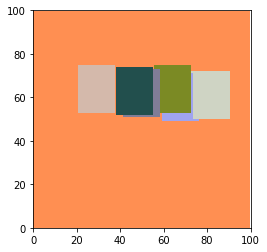

In [100]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
figure, ax = plt.subplots(1)

rect=[]
for i in range(7):
    rect.append(mpatches.Rectangle((buildingcordinate_xMin[i],buildingcordinate_zMin[i]),buildWidth_x[i],\
                                   buildHeight_z[i], facecolor=buildingColor1[i]))
    plt.axis([0,100,0,100])


ax.imshow(im2)
for i in range(7):
    ax.add_patch(rect[i])

In [13]:
env.close()

In [14]:
display.stop()